## Linear regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [7]:
df = pd.read_csv('./student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.shape

(25, 2)

In [9]:
X = df['Hours']
y = df['Scores']

In [10]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [11]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (20,)
X_test shape:  (5,)
y_train shape:  (20,)
y_test shape:  (5,)


In [12]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

Let's implement Linear Regression from scratch.

In short we try to approximate a linear function $f(x) = ax + b$ that fits the data points $(x_i, y_i)$.
It can be realized by the method of least squares, which minimizes the sum of the squares of the differences between the target values $y_i$ and the values predicted by the linear function $f(x_i)$. 
The equations are:
a = $\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$
b = $\bar{y} - a\bar{x}$

where $\bar{x}$ and $\bar{y}$ are the mean values of $x$ and $y$ respectively.

In [28]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    x_mean = np.mean(x)
    y_mean = np.mean(y)
  
    # calculating Numerator and Denominator
    num = np.sum((x - x_mean)*(y - y_mean))
    denom = np.sum((x - x_mean)**2)
  
    # calculating regression coefficients
    a = num / denom
    b = y_mean - a*x_mean
  
    return (b, a)

In [29]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

In [30]:
b, a = estimate_coef(X_train.flatten(), y_train.values.flatten())

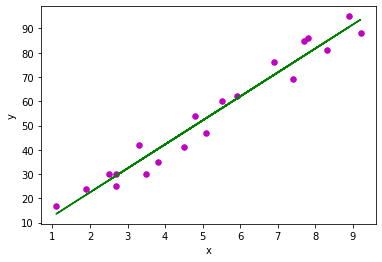

In [31]:
plot_regression_line(X_train.flatten(), y_train.values.flatten(), (b, a))

In [32]:
print("Estimated coefficients:\nb = {}  a = {}".format(b, a))

Estimated coefficients:
b = 2.7335338153432787  a = 9.877578006696952


In [33]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [34]:
print('Estimated intercept coefficient: {}'.format(regr.intercept_))
print('Estimated linear coefficients: {}'.format(regr.coef_))

Estimated intercept coefficient: 2.7335338153432787
Estimated linear coefficients: [9.87757801]


In [35]:
# Print score of the model R2 = 1 - (u/v), where u = ((y_true - y_pred) ** 2).sum() and v = ((y_true - y_true.mean()) ** 2).sum()
print(regr.score(X_test, y_test))

0.9112959641237304


In [36]:
y_pred = regr.predict(X_test)
print('R2 score: ', r2_score(y_test, y_pred))
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Root mean squared error: ', mean_squared_error(y_test, y_pred, squared=False))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))

R2 score:  0.9112959641237304
Mean squared error:  50.809671749927226
Root mean squared error:  7.128090329809747
Mean absolute error:  6.385109731908632


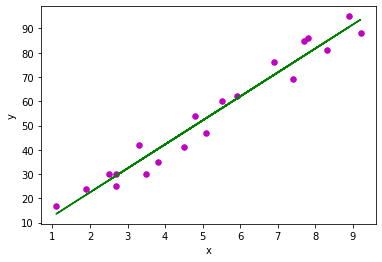

In [39]:
plot_regression_line(X_train, y_train, (regr.intercept_, regr.coef_))

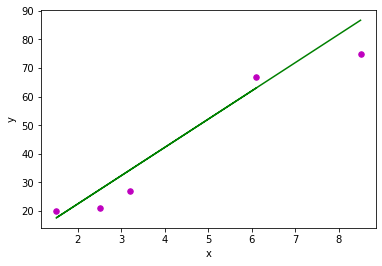

In [40]:
plot_regression_line(X_test, y_test, (regr.intercept_, regr.coef_))

In [41]:
regr = LinearRegression(fit_intercept=False)
regr.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [42]:
regr.score(X_test, y_test)

0.9106139745238826

In [43]:
y_pred = regr.predict(X_test)
print('R2 score: ', r2_score(y_test, y_pred))
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Root mean squared error: ', mean_squared_error(y_test, y_pred, squared=False))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))

R2 score:  0.9106139745238826
Mean squared error:  51.20031539272007
Root mean squared error:  7.15543956670169
Mean absolute error:  6.410459078167364


In [45]:
print('Estimated intercept coefficient: {}'.format(regr.intercept_))
print('Estimated linear coefficients: {}'.format(regr.coef_))

Estimated intercept coefficient: 0.0
Estimated linear coefficients: [10.31095385]


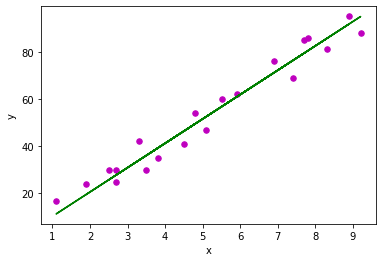

In [46]:
plot_regression_line(X_train, y_train, (regr.intercept_, regr.coef_))

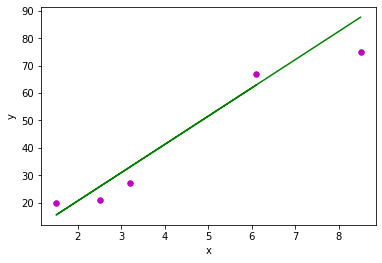

In [47]:
plot_regression_line(X_test, y_test, (regr.intercept_, regr.coef_))

In [48]:
poly = preprocessing.PolynomialFeatures(degree=3)
X_train_hof = poly.fit_transform(X_train)
X_test_hof = poly.transform(X_test)

In [53]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_hof, y_train)

LinearRegression()

In [54]:
print('Estimated intercept coefficient: {}'.format(regr.intercept_))
print('Estimated linear coefficients: {}'.format(regr.coef_))

Estimated intercept coefficient: 18.19178019376509
Estimated linear coefficients: [ 0.         -1.67236882  2.3896611  -0.14573904]


In [55]:
y_pred = regr.predict(X_test_hof)
print('R2 score: ', r2_score(y_test, y_pred))
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Root mean squared error: ', mean_squared_error(y_test, y_pred, squared=False))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))

R2 score:  0.9231053819934598
Mean squared error:  44.045237194146196
Root mean squared error:  6.636658586528781
Mean absolute error:  5.4139917641629856


In [85]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    x_sorted = np.sort(x, axis=0)
    x_hof = poly.transform(x_sorted)
    # predicted response vector
    y_pred = b[0] + np.sum(b[1:]*x_hof, axis=1)
  
    # plotting the regression line
    plt.plot(x_sorted, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

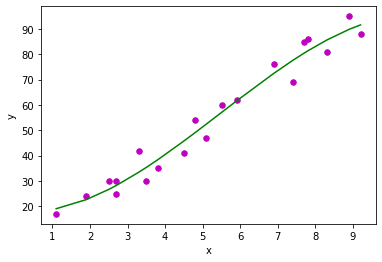

In [86]:
plot_regression_line(X_train, y_train, (regr.intercept_, *regr.coef_))

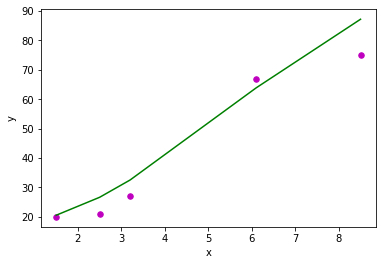

In [87]:
plot_regression_line(X_test, y_test, (regr.intercept_, *regr.coef_))

## Data Science Contest 
Predict the price of cars depending of their features. Investigate, which features are the most important. Apply any preprocessing techniques you think are necessary or useful.

In [35]:
cars = pd.read_csv('./labs/lab3/CarPrice_Assignment.csv')

In [36]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
